In [ ]:
 !pip install pandas
!pip install matplotlib
!pip install seaborn

^C


In [1]:
import pandas as pd

# Configuration

In [3]:
data_path = r"C:\Users\pltel\Downloads"

In [4]:
# Load the data
data = pd.read_table(f"{data_path}/validated.tsv")

C:\Users\pltel\AppData\Local\Temp\ipykernel_11712\1580107400.py:2: DtypeWarning: Columns (4,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(f"{data_path}/validated.tsv")


In [24]:
print(len(data))
print(data.columns)

739181
Index(['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain',
       'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment'],
      dtype='object')


In [17]:
data.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,28c575f5124adf57beac0b04fe92547753b12fa0532cd7...,common_voice_fr_41155447.mp3,506eccdacf3f95785eb834078fbba9f21528b8dfc3443b...,Les premiers jeux d'aventure étaient proposés ...,NaN,2,0,twenties,male_masculine,Français de France,NaN,fr,NaN
1,2ca636c915df1f93af996708934a5ea7eb437dfded2301...,common_voice_fr_40884068.mp3,5024ba6c9b8b5e5ef6ab558b8a8cad350e2d349c59cfb5...,"L'église de la Sainte Trinité, est le dernier ...",NaN,2,1,NaN,NaN,NaN,NaN,fr,NaN
2,2f910f0a334cca42fa8990836000a82591fd4009a77dd9...,common_voice_fr_40874512.mp3,10690cde59ba239e868484010224033a8b322868f4c55a...,Nana jouait la modestie.,NaN,2,0,NaN,NaN,NaN,NaN,fr,NaN
3,511264734314cf575a3a723d05d122097c24a8d02946f1...,common_voice_fr_41020281.mp3,5040eb8588942f2ceb70118bdd6e0f15d16cca9e47dc69...,Plusieurs membres sont tués et leurs découvert...,NaN,2,0,NaN,NaN,NaN,NaN,fr,NaN
4,717119c5871d1bb81cea5e8888a94c3a540c1ba5f50032...,common_voice_fr_41034068.mp3,5054ad65be62040b0c46fc617b7dc113186f7b5f4aad14...,Mais le projet prit du retard par manque de fi...,NaN,2,0,fourties,male_masculine,Français de France,NaN,fr,NaN


In [18]:
data.describe()

,up_votes,down_votes,variant,segment
count,122.000000,122.000000,0.0,0.0
mean,2.131148,0.008197,NaN,NaN
std,0.480200,0.090536,NaN,NaN
min,2.000000,0.000000,NaN,NaN
25%,2.000000,0.000000,NaN,NaN
50%,2.000000,0.000000,NaN,NaN
75%,2.000000,0.000000,NaN,NaN
max,4.000000,1.000000,NaN,NaN


In [19]:
# Hunt NaN values
data.isna().sum()

client_id            0
path                 0
sentence_id          0
sentence             0
sentence_domain    121
up_votes             0
down_votes           0
age                 30
gender              94
accents             11
variant            122
locale               0
segment            122
dtype: int64

In [8]:
# Print every unique value for each column
columns_to_print = ['sentence_domain', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment']
data_selected_to_print = data[columns_to_print]
for column in columns_to_print:
    print(f"{column}: {data[column].unique()}")

sentence_domain: [nan 'general' 'nature_environment' 'news_current_affairs'
 'technology_robotics']
age: [nan 'fifties' 'thirties' 'twenties' 'teens' 'fourties' 'sixties'
 'seventies' 'eighties']
gender: [nan 'male_masculine' 'female_feminine' 'do_not_wish_to_say' 'non-binary']
accents: [nan 'Français de France' 'Français du Canada' 'Français de Guadeloupe'
 'Français de Belgique' 'Français de Marseille ' 'Français de Suisse'
 'Français du Bénin' 'Français de Côte d’Ivoire'
 'Français de l’Île Maurice' 'Français d’Algérie' 'Français du Sénégal'
 'Français légèrement québécois ' 'Français du Portugal'
 'Français du Royaume-Uni' 'Français du Maroc' 'Français du Gabon'
 'Toulousain' 'Français de France,Français du Royaume-Uni'
 'Français du Cameroun' 'Français de France,Japonais'
 'Français de Madagascar' 'Français d’Allemagne' 'Marseillais ! '
 'quebecois du quebec' 'Français des États-Unis' 'Français de France,nord'
 'Français de La Réunion' 'Français avec accent écossais '
 'Accent mod

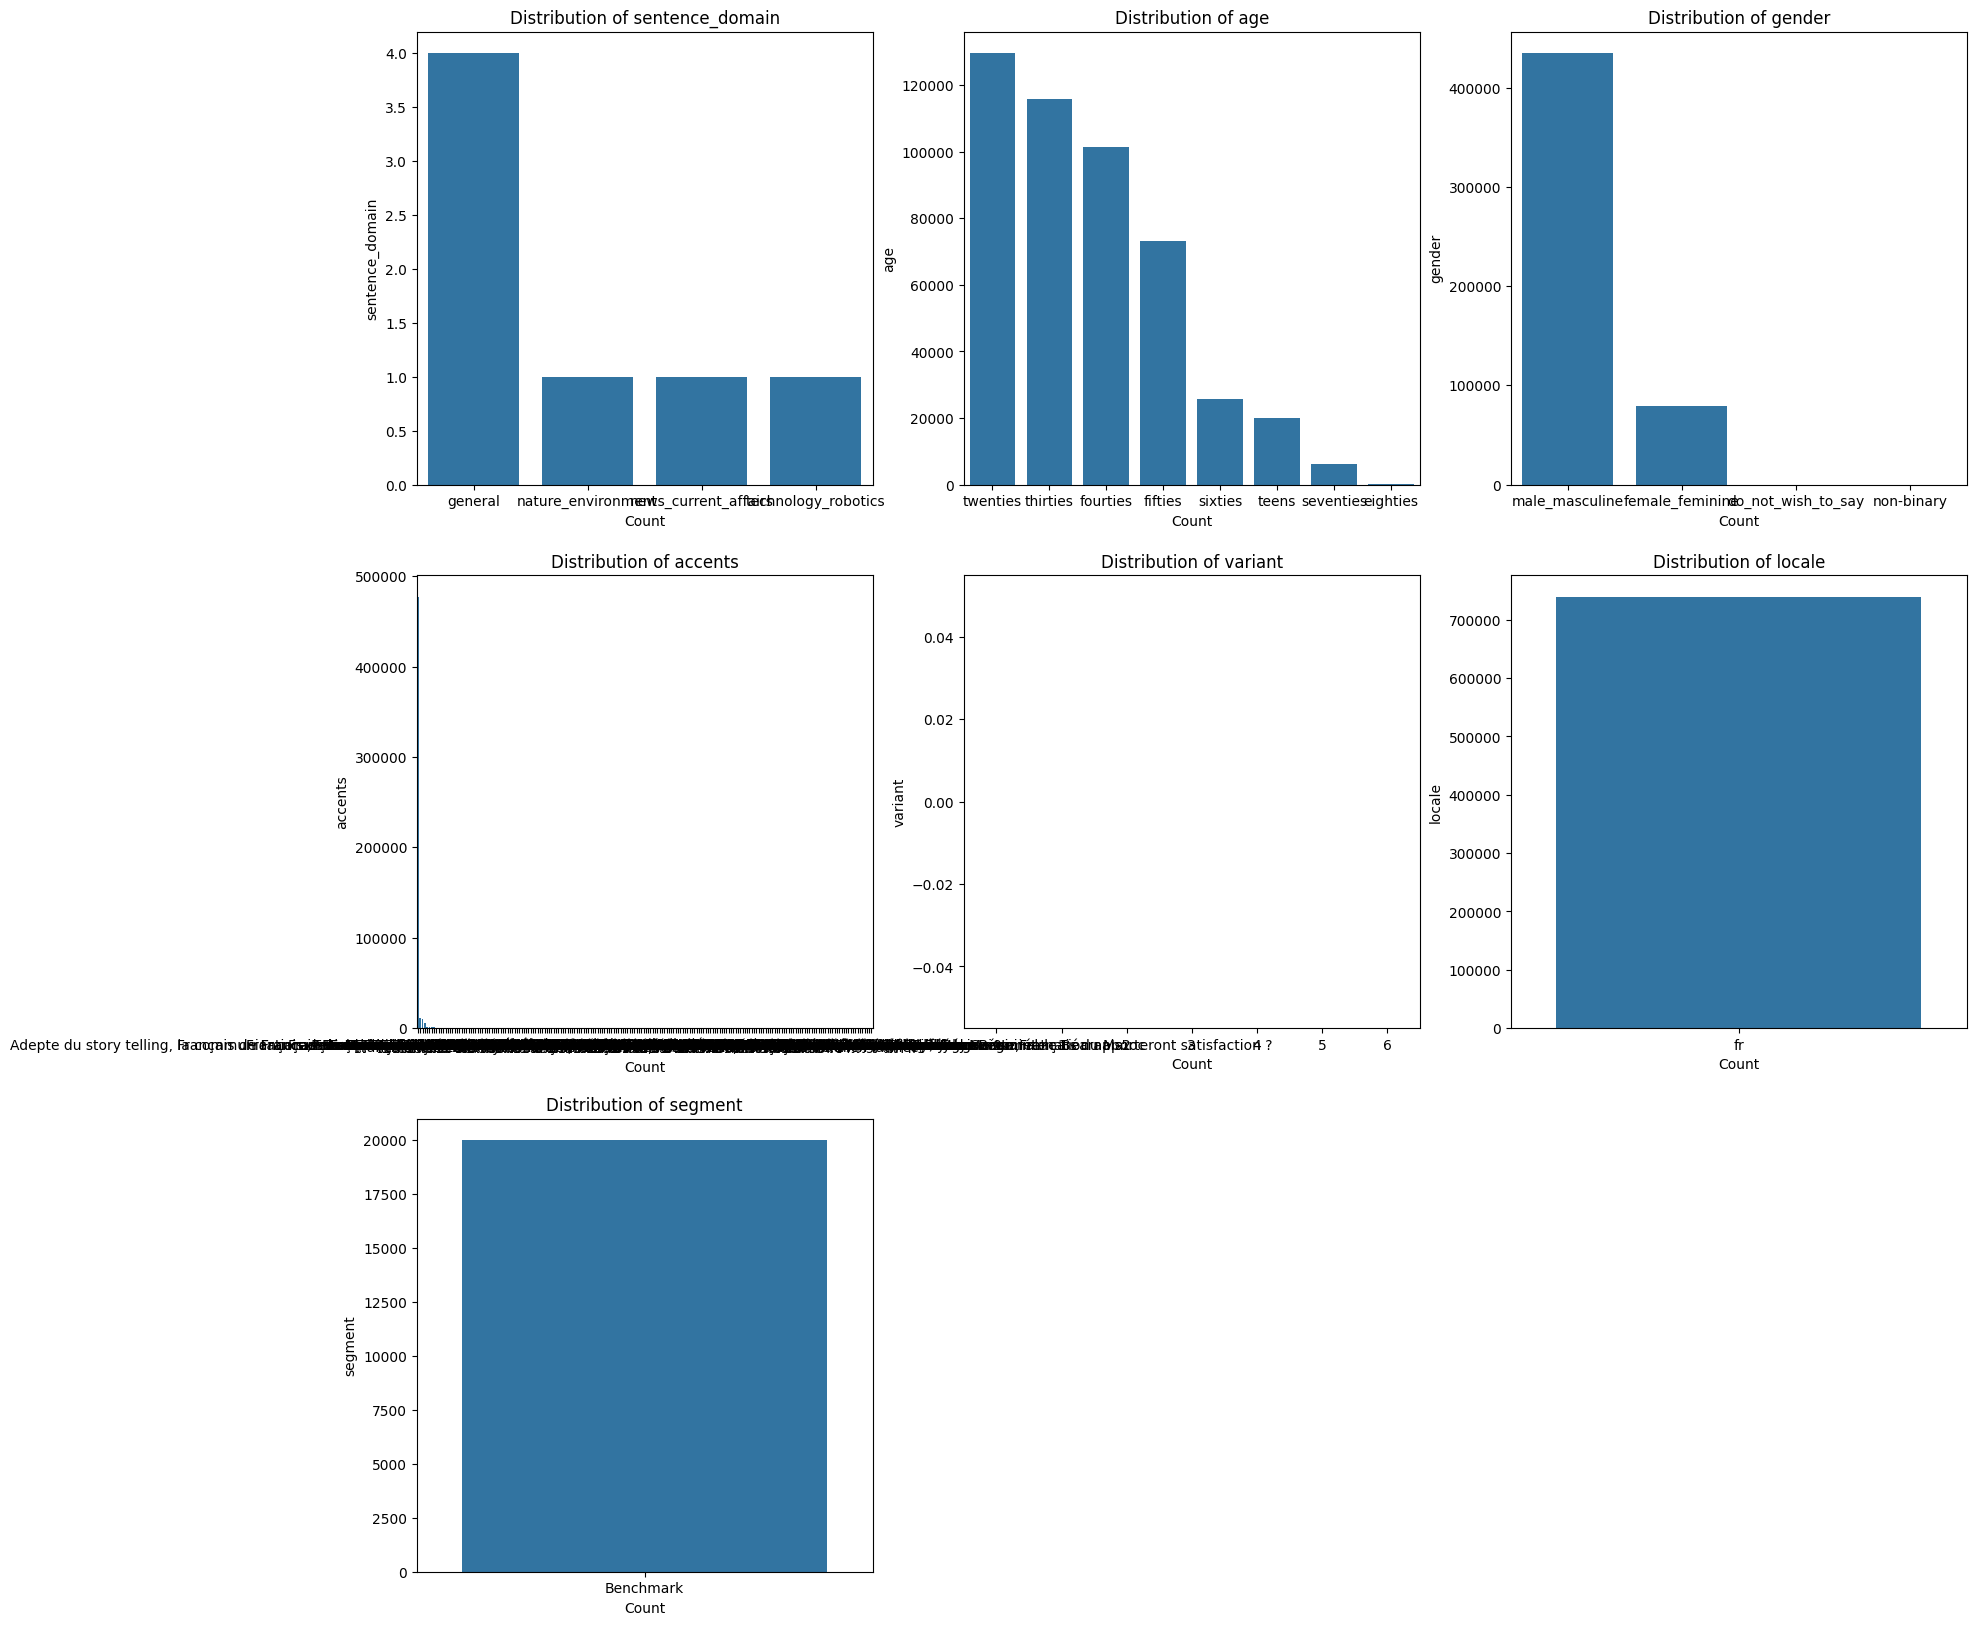

In [12]:
# Visualise repartition of the data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data distribution for each column
plt.figure(figsize=(20, 20))
for i,column in enumerate(data_selected_to_print.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=column, data=data, order=data_selected_to_print[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
plt.show()

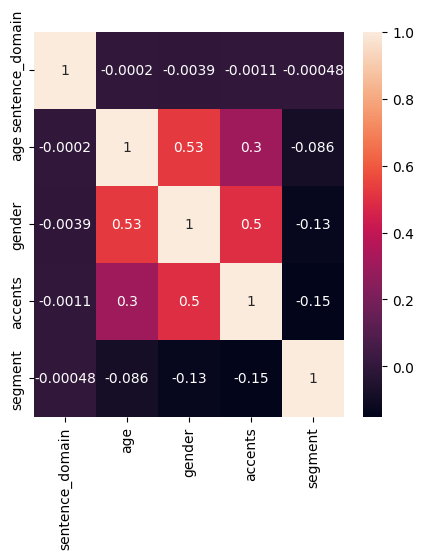

In [17]:
# Draw correlation matrix
# First encode every categorical column
from sklearn.preprocessing import LabelEncoder

data_encoded = data_selected_to_print.drop(columns=["variant","locale"]).copy()
data_encoded = data_encoded.apply(LabelEncoder().fit_transform)

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [33]:
#count every accen where Marseille is in it
# marseille_accent = data_selected_to_print['accents'].str.contains("marseille").count()
marseille_accent = data_selected_to_print['accents'].str.contains("marseil", case=False, na=False).sum()
print(f"Number of accents containing 'Marseille': {marseille_accent}")

# Display unique values excluding the filtered ones
remaining_accents = data_selected_to_print[~data_selected_to_print['accents'].str.contains("marseil", case=False, na=False)]
print("Unique values of accents excluding 'Marseille':")
print(remaining_accents['accents'].unique())

Number of accents containing 'Marseille': 178
Unique values of accents excluding 'Marseille':
[nan 'Français de France' 'Français du Canada' 'Français de Guadeloupe'
 'Français de Belgique' 'Français de Suisse' 'Français du Bénin'
 'Français de Côte d’Ivoire' 'Français de l’Île Maurice'
 'Français d’Algérie' 'Français du Sénégal'
 'Français légèrement québécois ' 'Français du Portugal'
 'Français du Royaume-Uni' 'Français du Maroc' 'Français du Gabon'
 'Toulousain' 'Français de France,Français du Royaume-Uni'
 'Français du Cameroun' 'Français de France,Japonais'
 'Français de Madagascar' 'Français d’Allemagne' 'quebecois du quebec'
 'Français des États-Unis' 'Français de France,nord'
 'Français de La Réunion' 'Français avec accent écossais '
 'Accent du sud ouest Hautes Pyrénées '
 'Français de France, non marqué par une langue régionale ' 'Neutre'
 'Français d’Algérie,Français de France'
 'Un français classique sans accent' 'Français du Béarn' 'île-de-France'
 'Français de Roumanie' '

In [49]:
import pandas as pd
from collections import Counter
import re

# Example data
data = pd.DataFrame({
    'accent': ['francais de france Marseille', 'Marseille', 'francais de france Paris', 'Paris', 'francais de belgique Bruxelles', 'Bruxelles']
})
data_accent_not_null = data_selected_to_print.dropna(subset=['accents'])
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.lower()
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('francais de', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('francais du', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('français de', '', case=False)
data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('français du', '', case=False)

# Tokenize the labels and count word frequencies
all_words = []
for label in data_accent_not_null['accents']:
    words = re.findall(r'\w+', label.lower())
    all_words.extend([word for word in words if len(word) >= 5])


word_freq = Counter(all_words)

# Identify common words (you can set a threshold for frequency)
# common_words = [word for word, freq in word_freq.items() if freq > 1]
common_words = [word for word, freq in word_freq.most_common(9)]


# Function to assign group based on common words
def assign_group(label):
    for word in common_words:
        if word in label.lower():
            return word.capitalize()
    return 'Other'

# Apply the function to the 'accent' column
data_accent_not_null['accent_grouped'] = data_accent_not_null['accents'].apply(assign_group)

# Count the frequency of each group
group_counts = data_accent_not_null['accent_grouped'].value_counts().to_dict()

# Add the population count to the DataFrame
data_accent_not_null['group_population'] = data_accent_not_null['accent_grouped'].map(group_counts)
# Create a new DataFrame to reference the groups
group_reference = pd.DataFrame(list(group_counts.items()), columns=['Group', 'Population'])

print(group_reference)
print(data_accent_not_null)

C:\Users\pltel\AppData\Local\Temp\ipykernel_11712\66222560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_accent_not_null['accents'] = data_accent_not_null['accents'].str.lower()
C:\Users\pltel\AppData\Local\Temp\ipykernel_11712\66222560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_accent_not_null['accents'] = data_accent_not_null['accents'].str.replace('francais de', '', case=False)
C:\Users\pltel\AppData\Local\Temp\ipykernel_11712\66222560.py:12: SettingWithCopyWarning: 
A value is

      Group  Population
0    France      482293
1    Canada       11119
2  Belgique       10360
3    Suisse        5232
4     Other        2633
5   Réunion        1249
6  Français        1142
7     Bénin        1009
8     États         985
       sentence_domain       age          gender      accents  variant locale  \
2                  NaN       NaN             NaN       france      NaN     fr   
7                  NaN  thirties  male_masculine       canada      NaN     fr   
11                 NaN       NaN             NaN       france      NaN     fr   
16                 NaN       NaN             NaN   guadeloupe      NaN     fr   
20                 NaN       NaN             NaN     belgique      NaN     fr   
...                ...       ...             ...          ...      ...    ...   
739176             NaN       NaN  male_masculine       france      NaN     fr   
739177             NaN       NaN  male_masculine       france      NaN     fr   
739178             NaN       Na

C:\Users\pltel\AppData\Local\Temp\ipykernel_11712\66222560.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_accent_not_null['accent_grouped'] = data_accent_not_null['accents'].apply(assign_group)
C:\Users\pltel\AppData\Local\Temp\ipykernel_11712\66222560.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_accent_not_null['group_population'] = data_accent_not_null['accent_grouped'].map(group_counts)
